## A tiny neural network classifier

In order to classify the examples, we will use the following simple neural network:

<img src="images/nn.png" width="700">

where $\sigma$ is the sigmoid function defined as:

$$
    \sigma(x) = \frac{1}{1+ e^{-x}}
$$

### Exercise

Assume that the parameters of the neural network are as follows: 

\begin{aligned}
& w_1 = -5 & w_2 = 10 && w_3 = 5 \\
& w_4 = -10 & w_5 = 20 && w_6 = 20 \\
& b_1 = 25 & b_2 = 40 && b_3 = -30 
\end{aligned}

What would be the predicted label for the following data points:

 | x1 | x2 | o | label |
 |-------|-------|-----|-------|
 | 4     | -4    |     |       |
 |-4     | 4     |     |       |
 | -4    | -4    |     |       |
 | 4     | 4     |     |       |

You can use the following piece of code to evaluate the output of the network:

In [15]:
import numpy as np

# Code to obtain utils.py
!wget https://raw.githubusercontent.com/lcharlin/80-629/master/week5-NeuralNetworks/utils.py
#!rm -rf 80-629
#!git clone https://github.com/lcharlin/80-629/
#import sys
#sys.path += ['80-629/week5-NeuralNetworks/']

--2020-10-01 23:38:50--  https://raw.githubusercontent.com/lcharlin/80-629/master/week5-NeuralNetworks/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.124.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.124.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11201 (11K) [text/plain]
Saving to: ‘utils.py.1’

utils.py.1          100%[===================>]  10.94K  --.-KB/s    in 0.002s  

2020-10-01 23:38:51 (4.59 MB/s) - ‘utils.py.1’ saved [11201/11201]



In [2]:
def sigmoid(x): 
    return 1 / (1 + np.exp(-x))

def nn1(x1, x2, w1, w2, w3, w4, w5, w6, b1, b2, b3):
    h1 = sigmoid(w1*x1 + w3*x2 + b1)
    h2 = sigmoid(w2*x1 + w4*x2 + b2)
    o = sigmoid(w5*h1 + w6*h2 + b3)
    return o

## Finding good parameters for our network

Let's move to a slightly more realistic example. Here we focus on the task of (binary) classification. As always, we first load the data that we want to classify:

In [3]:
from utils import load_data, plot_boundaries, plot_data # we wrote some helper functions
X_train, y_train, X_test, y_test = load_data()          # to help with data loading

You can plot the data using the helper function `plot_data`:

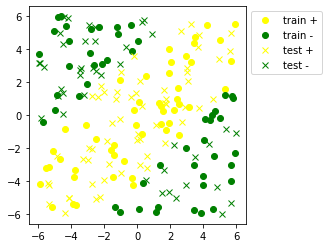

In [4]:
plot_data(X_train, y_train, X_test, y_test)

As you can see, this data is not linearly separable. In other words, the positive and negative examples can not be separated using a linear classifier. Our goal for the rest of this notebook-session is to learn the parameters of a neural-network model which can separate the positives from the negative examples.

What do we mean by *learning the parameters*? Remember that our neural network has 9 parameters including three biases ($w_1, \ldots, w_6, b_1, b_2, b_3$). Every different assignment of values to these parameters leads to a different classifier. We want to find the one which matches our data the best.

Let's see how different choices of parameters changes the classifier. For a given set of parameter, the function `plot_boundaries` shows the regions of positive prediction (colored blue) and negative prediction (colored red):

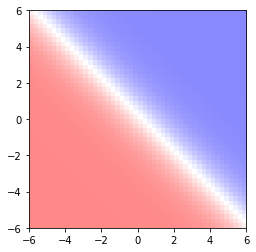

In [5]:
w1 = 1; w2 = 1; w3 = 1; w4 = 1; w5 = 1; w6 = 1
b1 = 0; b2 = 0; b3 = -1
plot_boundaries(w1, w2, w3, w4, w5, w6, b1, b2, b3)

Now let's project the plot of data on these decision boundaries:

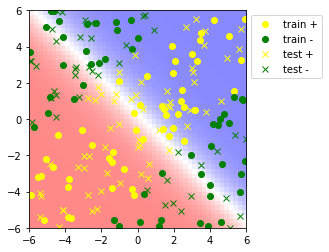

In [6]:
plot_boundaries(w1, w2, w3, w4, w5, w6, b1, b2, b3)
plot_data(X_train, y_train, X_test, y_test)

It appears that the classifier obtained using the above set of parameters does not match our data. (Of course, this is to be expected. This classifier with fixed weights a priori has a high bias and a low variance.)

### Exercise
Try the alternatives below and see which one is a better match for our data:

In [7]:
w1 = -1; w2 = -1; w3 = -1; w4 = -1; w5 = 4; w6 = -3
b1 = -4; b2 = 4; b3 = 1

In [8]:
w1 = 1; w2 = -1; w3 = -1; w4 = -1; w5 = -4; w6 = 3
b1 = 4; b2 = -4; b3 = 2

In [9]:
w1 = -1; w2 = 2; w3 = 1; w4 = -2; w5 = 4; w6 = 4
b1 = 5; b2 = 8; b3 = -6

Obviously, we need a better way than trial and error to find the best parameters. The way that we do this is by *minimizing a loss function*. 

## Loss function

A *loss function* evaluates how much the predictions of our classifier are different from the actual labels. The loss function that we will use for our network is the *binary cross-entropy* loss. Let's represent our training data by the set $\{(X_1, y_1), \ldots, (X_n , y_n)\}$ and our neural network function by $f$. Then the binary cross-entropy loss function will be defined as:

\begin{equation}
    \ell = \sum_{i=1}^n -y_i \log f(X_i) - (1-y_i) log(1-f(X_i))
\end{equation}

The binary cross-entropy relates to the Bernoulli distribution (maximizing the Bernoulli likelihood is equivalent to minimizing the binary cross-entropy). **It is the loss function that should be used for binary classification problems.**

### Exercise
Let's see what this loss function means using a tiny example. Assume that our training data consists of only four examples, and the values of $X, f(X), y$ of those four examples are as follows:

|X|f(X)|y|
|:---|:---|:---|
|(5.4, 1.6)|1|1|
|(1.4, -0.5)|0.3679|1|
|(3.5, -3)|0.8647|0|
|(-3.5, 1.1)|0|0|

Calculate the loss function using the equation above. You can calculate the *log* using this function:

In [10]:
np.log(0.5)

-0.6931471805599453

It is important to remember that the loss function $l$ is a function of network parameters, since it is defined in terms of the network output. We can write the loss function as:

\begin{equation}
    \ell(\mathbf{w}, \mathbf{b}) = \sum_{i=1}^n -y_i \log f(X_i, \mathbf{w}, \mathbf{b}) - (1-y_i) log(1-f(X_i, \mathbf{w}, \mathbf{b}))
\end{equation}

In principle, we want to find the set of parameters $\mathbf{w}, \mathbf{b}$ for which $\ell(\mathbf{w}, \mathbf{b})$ has the smallest value. We will use *gradient descent* to find these values. 

### Minimization by gradient descent

The plot below shows the function $f(x_1, x_2) = x_1^2 + x_2^2$:

<img src="images/descent.png" width="700">


### Exercise
Point A on the plot has coordinates $(1, 1, 3)$. The blue vector AB shows the direction $(-1, -1)$, and the green vector AC shows the direction $(0, -1)$. 
Assume that we are at initial point $(1, 1)$ and we want to move in a direction that minimizes the function $f$. Which of these two directions moves faster towards the minimum: $(-1, -1)$ or $(0, -1)$?

### Exercise
Calculate the gradient of function $f$ in the point $(1, 1)$. How is this gradient related to the fastest path to the minimum (i.e. the steepest descent)?

## Training the neural network

We now understand the theory of training neural networks. But how do we do this in practice? We will now develop our practical skills using the *scikit-learn* library to train our tiny network. Let's first define the network:

In [11]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(2,), 
                    activation='logistic', 
                    solver='lbfgs',
                    random_state=0,
                    max_iter=500,
                    tol=1e-7)

The argument `hidden_layer_sizes=(2,)` states that we only have one hidden layer with two neurons, and the argument `activation='logistic'` shows that we use the sigmoid activation function (Let's ignore the other arguments for now). 

We will now train the network using our training data:

In [12]:
clf.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='lbfgs',
              tol=1e-07, validation_fraction=0.1, verbose=False,
              warm_start=False)

Once the network is trained, use the helper function `tiny_net_parameters` to get the parameters of the trained network (`tiny_net_parameters` is a wrapper around `clf.coefs_` and `clf.intercepts_`):

In [13]:
from utils import tiny_net_parameters
w1, w2, w3, w4, w5, w6, b1, b2, b3 = tiny_net_parameters(clf)

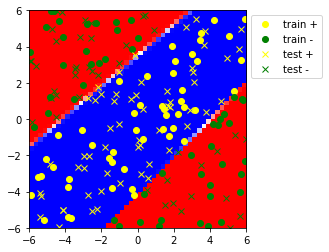

In [14]:
plot_boundaries(w1, w2, w3, w4, w5, w6, b1, b2, b3)
plot_data(X_train, y_train, X_test, y_test)

The learned classifier does a good job at predicting labels both for the training examples and unseen examples (test data). 

## Playground exercises

We will now investigate a few properties of neural networks using [tensorflow playground](https://playground.tensorflow.org/). Take a few minutes to familiarize yourself with the playground:

- Change the number of hidden layers to one
- Change the data distribution to *exclusive OR*
- Push the *run* button and see how the network is trained
- Stop training after epoch 500 (each epoch involves doing gradient descent using the complete dataset)
- Hover over the neurons in the hidden layer and see the vizualization of their outputs. 

### Learning rate

Open [this](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=3&regularizationRate=0&noise=35&networkShape=1&seed=0.68448&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) example on tensorflow playground. 

- Push the *run* button and see the learning process for 500 epochs. What do you observe?
- Stop training and press the *restart* button. Change the learning rate from 3 to 0.1, and press the *run* button again. What is different from the previous run?
- Try these steps using three learning rates: 0.3, 0.03, and 0.003:
 + Press the *reset* button
 + Change the learning rate
 + Press the *step* button (located at the right of *run* button) a few times, and observe how the training/test loss changes in each step. 
 
Which of those three rates would you use? 

### Regularization

Open [this](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=50&networkShape=4,4&seed=0.64895&showTestData=false&discretize=false&percTrainData=10&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) example on playground. 

Let's first observe a few things about this example. Check the box titled *Show test data*. Uncheck the box again. As you can see, the data is noisy and the number of training examples is small. This is a situation prone to overfitting. 
- Press the *run* button and let the training proceed for 500 epochs, then pause the training. 
- What do you think about the decision boundary of the classifier? 
- What causes the difference between the training error and test error? (Check the *Show test data* box again)
- Write down the test error

We will now see how we can avoid overfitting using $L_2$ regularization. 
- Press the *restart* button
- Change *regularization* from *None* to *L2*
- Change *Regularization rate* from 0 to 0.3
- Press the *run* button and run the model for 500 epochs
- What is different from the previous setting? 
- Write down the test error

Just like learning rate, different regularization rates will affect the classifier performance. Try these steps with regularization rates 0.03 and 0.003:
- Press the *restart* button
- Change *Regularization rate*
- Press the *run* button and run the model for 500 epochs
- Write down the test error

Which of these regularization rates would you use?